# COURSE: Master Python for scientific programming by solving projects
## PROJECT: Number theory
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/maspy_x/?couponCode=202201

In [ ]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

# Counting perfect numbers

In [ ]:
def test4perfect(number):

  # initialize
  divisors = []

  # find integer divisors
  for d in range(1,number):
    if number%d == 0:
      divisors.append(d)
  
  # test for equality
  return sum(divisors)==number

In [ ]:
test4perfect(30)

In [ ]:
perfect = []

for number in range(2,10000):
  if test4perfect(number):
    perfect.append(number)

print(perfect)

# Pythagorean triplets via Euclid

$a=m^{2}-n^{2}\\
b=2mn\\
c=m^{2}+n^{2}\\
m>n>0$



In [ ]:
numberrange = np.arange(2,51)

a = []
b = []
c = []

for m in numberrange:
  for n in numberrange[:-1]:
    a.append( m**2 - n**2 )
    b.append( 2*m*n )
    c.append( m**2 + n**2 )


In [ ]:
fig,ax = plt.subplots(1,figsize=(10,7))
plt.scatter(a,b,marker='o',c=c, alpha=.5,linewidths=.5,edgecolors='k')
plt.axis('off')
plt.show()

In [ ]:
check = np.array(a)**2 + np.array(b)**2 - np.array(c)**2

plt.plot(check,'o');

In [ ]:
numberrange

# Fermat's theorem

There are no integer solutions to $x^3+y^3=z^3$

In [47]:
ints = np.arange(1,101)

z = np.zeros((len(ints),len(ints)))

# run the simulation
for x in ints:
  for y in ints:
    z[x-1,y-1] = (x**3 + y**3)**(1/3)


In [48]:
# check for integers
zInts = z%1 == 0


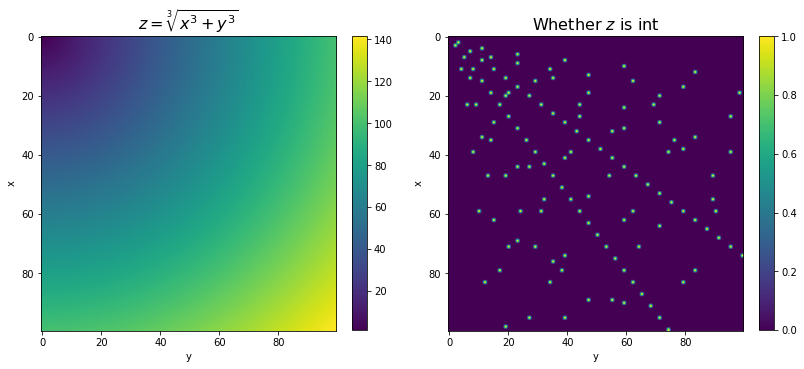

In [49]:

# now visualize
fig,ax = plt.subplots(1,2,figsize=(12,6))
fig.tight_layout(pad=5)

# show the resulting z-values
h = ax[0].imshow(z)
fig.colorbar(h,ax=ax[0],fraction=.045)
ax[0].set_xlabel('y')
ax[0].set_ylabel('x')
ax[0].set_title('$z=\sqrt[3]{x^3+y^3}$',fontsize=16)

# show the boolean integer map
h = ax[1].imshow(zInts,vmin=0,vmax=1)
fig.colorbar(h,ax=ax[1],fraction=.045)
ax[1].set_xlabel('y')
ax[1].set_ylabel('x')
ax[1].set_title('Whether $z$ is int',fontsize=16)

plt.show()

# Plotting number sequences


In [ ]:
# initialize
s1 = np.array([])
s2 = np.array([])
s3 = np.array([])
s4 = np.array([])
N = 80


# generate the sequences
for n in range(1,N):
  s1 = np.append(s1,n/(n+1))
  s2 = np.append(s2,(n+1)/n)
  s3 = np.append(s3,n/sum(np.arange(1,n+1)))
  s4 = np.append(s4,(-1)**n/np.sqrt(n))


# plotting
fig,ax = plt.subplots(1,figsize=(10,7))
plt.plot(s1,label='$n/(n+1)$')
plt.plot(s2,label='$(n+1)/n$')
plt.plot(s3,label='$n/\Sigma(n)$')
plt.plot(s4,label='$-1^n/\sqrt{n}$')
plt.legend(loc='upper right')
plt.show()

In [ ]:
np.arange(10)

In [ ]:
# visualize
fig,ax = plt.subplots(1,figsize=(10,7))

plt.plot(firings[0,:],firings[1,:],'k.',markersize=1)
plt.xlabel('Time (ms)')
plt.ylabel('Neuron #')
# plt.xlim([1000,2000])
plt.show()

# Heron's method of square roots

In [ ]:
num = 100
x = [num/3]
for n in range(5):
  betterguess = ( x[n] + num/x[n] )/2
  x.append( betterguess )

x

In [ ]:
nums2sqrt = np.linspace(2,100,50)
niterations = np.arange(3,9)

# initialize
err = np.zeros((len(niterations),len(nums2sqrt)))


# loop over the numbers to compute
for ni,num in enumerate(nums2sqrt):
  
  # loop over number of iterations
  for ii,iters in enumerate(niterations):
  
    # initial guess
    x = [ num/3 ] # force to be a list!
      
    # implement algorithm
    for n in range(iters):
      betterguess = ( x[n] + num/x[n] )/2
      x.append( betterguess )
      
    # store error magnitude
    err[ii,ni] = abs(x[-1]-np.sqrt(num))


In [ ]:
plt.imshow(-np.log(err),aspect=10,extent=[nums2sqrt[0],nums2sqrt[-1],niterations[-1],niterations[0]])
plt.xlabel('Number')
plt.ylabel('Iterations')
plt.show()

# Smooth numbers




In [ ]:
# largest number to search in
maxN = 10000

# find the smooth numbers up to that number
smoothnumbers = np.zeros(maxN+1,dtype=int)

for i in range(2,maxN+1): # note: start at 2! not zero!
  smoothnumbers[i] = np.max(sym.primefactors(i))

# show the smooth numbers on a plot
fig,ax = plt.subplots(1,figsize=(10,7))
plt.plot(smoothnumbers,'k.',markersize=.5)
plt.xlabel('Number')
plt.ylabel('Smooth number')
plt.show()

In [ ]:
# count the number of occurrences

# find all unique smooth numbers (basically all the primes)
uniqueSmoothNums = np.unique(smoothnumbers)

# count the number of times each smooth number appears
num = np.zeros(len(uniqueSmoothNums),dtype=int)
for i,u in enumerate(uniqueSmoothNums):
  num[i] = np.sum(smoothnumbers==u)


# and visualize the counts by the smooth numbers
plt.plot(uniqueSmoothNums,num,'k.')
plt.xlabel('Smooth number')
plt.ylabel('Number of occurrences')
plt.xlim([-1,500])
plt.title('%s is the modal smooth number' %uniqueSmoothNums[np.argmax(num)])
plt.show()